In [32]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('bank_marketing_updated_v1.csv', skiprows= 2)

In [34]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [35]:
df.drop('customerid', inplace= True , axis = 1)

In [36]:
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [37]:
((df.response.isnull().sum())/(len(df.response)))*100

0.0663555329455221

In [38]:
df.salary.describe()

count     45211.000000
mean      57006.171065
std       32085.718415
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

In [39]:
df.dtypes

age         float64
salary        int64
balance       int64
marital      object
jobedu       object
targeted     object
default      object
housing      object
loan         object
contact      object
day           int64
month        object
duration     object
campaign      int64
pdays         int64
previous      int64
poutcome     object
response     object
dtype: object

In [42]:
df.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [49]:
df['job'] = df.jobedu.apply(lambda x : x.split(',')[0])

In [50]:
df['education'] = df.jobedu.apply(lambda x : x.split(',')[1])

In [51]:
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [53]:
df.drop('jobedu', inplace= True, axis = 1)

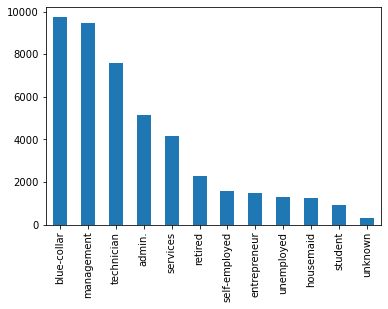

In [55]:
df.job.value_counts().plot.bar()
plt.show()

In [59]:
df.groupby('education')['salary'].mean()

education
primary      34212.377755
secondary    49743.815188
tertiary     82873.618525
unknown      46558.427571
Name: salary, dtype: float64

In [60]:
df.groupby('education')['salary'].median()

education
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: salary, dtype: float64

In [62]:
df.groupby('education')['response'].value_counts(normalize= True)

education  response
primary    no          0.913647
           yes         0.086353
secondary  no          0.894390
           yes         0.105610
tertiary   no          0.849910
           yes         0.150090
unknown    no          0.864224
           yes         0.135776
Name: response, dtype: float64